In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
from datetime import timedelta

In [2]:
CUTOFF_DT = '2018-11-30'   # rolling window test train cutoff date

df = pd.read_excel('StockX-Data-Contest-2019-3.xlsx', sheet_name='Raw Data')
df

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097.0,220,2016-09-24,11.0,California
1,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685.0,220,2016-11-23,11.0,California
2,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690.0,220,2016-11-23,11.0,California
3,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075.0,220,2016-11-23,11.5,Kentucky
4,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828.0,220,2017-02-11,11.0,Rhode Island
...,...,...,...,...,...,...,...,...
99951,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,565.0,220,2018-12-26,8.0,Oregon
99952,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,598.0,220,2018-12-26,8.5,California
99953,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,605.0,220,2018-12-26,5.5,New York
99954,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,650.0,220,2018-12-26,11.0,California


In [3]:
df['Sneaker Name'] = df['Brand'] + ' - ' + df['Sneaker Name']
df.drop(['Brand', 'Buyer Region', 'Release Date', 'Retail Price'], axis=1, inplace=True)
df

,Order Date,Sneaker Name,Sale Price,Shoe Size
0,2017-09-01,Yeezy - Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097.0,11.0
1,2017-09-01,Yeezy - Adidas-Yeezy-Boost-350-V2-Core-Black-...,685.0,11.0
2,2017-09-01,Yeezy - Adidas-Yeezy-Boost-350-V2-Core-Black-...,690.0,11.0
3,2017-09-01,Yeezy - Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075.0,11.5
4,2017-09-01,Yeezy - Adidas-Yeezy-Boost-350-V2-Core-Black-...,828.0,11.0
...,...,...,...,...
99951,2019-02-13,Yeezy - adidas-Yeezy-Boost-350-V2-Static-Refl...,565.0,8.0
99952,2019-02-13,Yeezy - adidas-Yeezy-Boost-350-V2-Static-Refl...,598.0,8.5
99953,2019-02-13,Yeezy - adidas-Yeezy-Boost-350-V2-Static-Refl...,605.0,5.5
99954,2019-02-13,Yeezy - adidas-Yeezy-Boost-350-V2-Static-Refl...,650.0,11.0


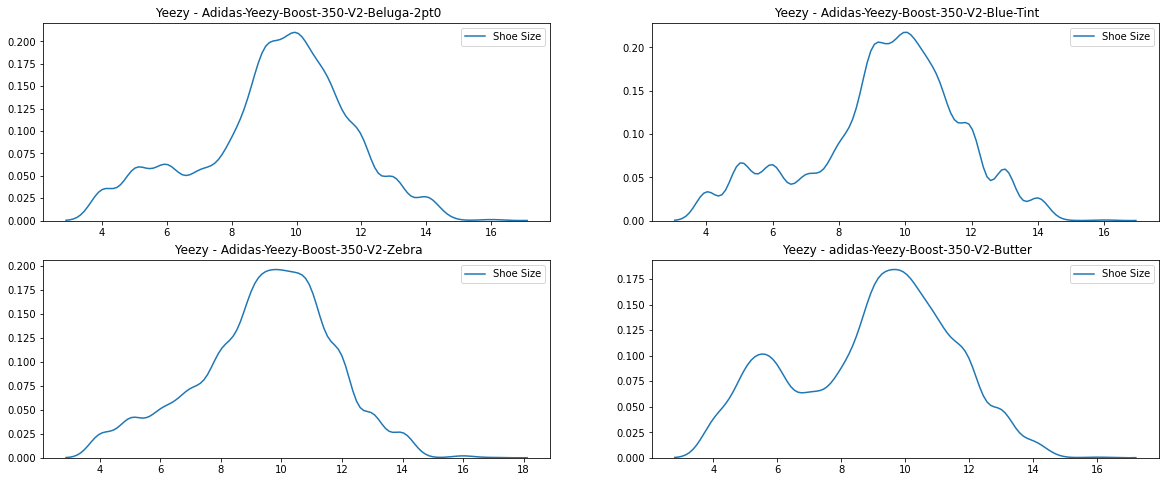

In [4]:
top_sneakers = df.groupby(['Sneaker Name', 'Shoe Size']).size().reset_index().nlargest(9, 0)['Sneaker Name'].to_list()
top_sneakers = sorted(list(set(top_sneakers)))

fig = plt.figure(figsize=(20,8))
gs2 = gs.GridSpec(2, 2)

for i in range(0, len(top_sneakers)):
    ax = fig.add_subplot(gs2[i])
    sns.kdeplot(data=df[df['Sneaker Name']==top_sneakers[i]]['Shoe Size'], ax=ax)
    ax.set_title(top_sneakers[i])

In [5]:
df_top = df[(df['Sneaker Name'].isin(top_sneakers)) & (df['Shoe Size'].isin([9, 10, 11]))].copy()
df_top

,Order Date,Sneaker Name,Sale Price,Shoe Size
15,2017-09-01,Yeezy - Adidas-Yeezy-Boost-350-V2-Zebra,658.0,11.0
16,2017-09-01,Yeezy - Adidas-Yeezy-Boost-350-V2-Zebra,650.0,11.0
17,2017-09-01,Yeezy - Adidas-Yeezy-Boost-350-V2-Zebra,610.0,10.0
18,2017-09-01,Yeezy - Adidas-Yeezy-Boost-350-V2-Zebra,589.0,9.0
20,2017-09-01,Yeezy - Adidas-Yeezy-Boost-350-V2-Zebra,546.0,9.0
...,...,...,...,...
99880,2019-02-13,Yeezy - adidas-Yeezy-Boost-350-V2-Butter,234.0,9.0
99882,2019-02-13,Yeezy - adidas-Yeezy-Boost-350-V2-Butter,228.0,9.0
99883,2019-02-13,Yeezy - adidas-Yeezy-Boost-350-V2-Butter,234.0,10.0
99885,2019-02-13,Yeezy - adidas-Yeezy-Boost-350-V2-Butter,243.0,10.0


In [6]:
df_agg = df_top.copy().groupby(['Order Date', 'Sneaker Name', 'Shoe Size']).mean().reset_index()
df_agg

,Order Date,Sneaker Name,Shoe Size,Sale Price
0,2017-09-01,Yeezy - Adidas-Yeezy-Boost-350-V2-Zebra,9.0,567.500000
1,2017-09-01,Yeezy - Adidas-Yeezy-Boost-350-V2-Zebra,10.0,610.000000
2,2017-09-01,Yeezy - Adidas-Yeezy-Boost-350-V2-Zebra,11.0,654.000000
3,2017-09-02,Yeezy - Adidas-Yeezy-Boost-350-V2-Zebra,9.0,584.000000
4,2017-09-02,Yeezy - Adidas-Yeezy-Boost-350-V2-Zebra,10.0,625.000000
...,...,...,...,...
3495,2019-02-13,Yeezy - Adidas-Yeezy-Boost-350-V2-Zebra,9.0,347.500000
3496,2019-02-13,Yeezy - Adidas-Yeezy-Boost-350-V2-Zebra,10.0,346.666667
3497,2019-02-13,Yeezy - Adidas-Yeezy-Boost-350-V2-Zebra,11.0,350.000000
3498,2019-02-13,Yeezy - adidas-Yeezy-Boost-350-V2-Butter,9.0,231.000000


In [7]:
start_dt = df_agg['Order Date'].min()
end_dt = df_agg['Order Date'].max()

df_cal = pd.DataFrame({'dt': pd.date_range(start_dt, end_dt)})
df_cal['dt_txt'] = df_cal['dt'].apply(lambda x: x.strftime('%Y-%m-%d')) 
# 30, 60, and 90 days look-behind, 1 week look ahead
df_cal['dts_30'] = df_cal['dt'].apply(lambda x: pd.date_range(x, x + timedelta(30 - 1)).strftime('%Y-%m-%d').to_list())
df_cal['dts_60'] = df_cal['dt'].apply(lambda x: pd.date_range(x, x + timedelta(60 - 1)).strftime('%Y-%m-%d').to_list())
df_cal['dts_90'] = df_cal['dt'].apply(lambda x: pd.date_range(x, x + timedelta(90 - 1)).strftime('%Y-%m-%d').to_list())
df_cal['dts_120'] = df_cal['dt'].apply(lambda x: pd.date_range(x, x + timedelta(120 - 1)).strftime('%Y-%m-%d').to_list())
df_cal['dts_150'] = df_cal['dt'].apply(lambda x: pd.date_range(x, x + timedelta(150 - 1)).strftime('%Y-%m-%d').to_list())

df_cal['dts_30_last'] = df_cal['dt'].apply(lambda x: (x + timedelta(30 - 1)).strftime('%Y-%m-%d'))
df_cal['dts_60_last'] = df_cal['dt'].apply(lambda x: (x + timedelta(60 - 1)).strftime('%Y-%m-%d'))
df_cal['dts_90_last'] = df_cal['dt'].apply(lambda x: (x + timedelta(90 - 1)).strftime('%Y-%m-%d'))
df_cal['dts_120_last'] = df_cal['dt'].apply(lambda x: (x + timedelta(120 - 1)).strftime('%Y-%m-%d'))
df_cal['dts_150_last'] = df_cal['dt'].apply(lambda x: (x + timedelta(150 - 1)).strftime('%Y-%m-%d'))

df_cal['dts_30_plus_7'] = df_cal['dt'].apply(lambda x: (x + timedelta(37)).strftime('%Y-%m-%d'))
df_cal['dts_60_plus_7'] = df_cal['dt'].apply(lambda x: (x + timedelta(67)).strftime('%Y-%m-%d'))
df_cal['dts_90_plus_7'] = df_cal['dt'].apply(lambda x: (x + timedelta(97)).strftime('%Y-%m-%d'))

df_cal['dts_60_plus_30'] = df_cal['dt'].apply(lambda x: (x + timedelta(90)).strftime('%Y-%m-%d'))
df_cal['dts_90_plus_30'] = df_cal['dt'].apply(lambda x: (x + timedelta(120)).strftime('%Y-%m-%d'))
df_cal['dts_120_plus_30'] = df_cal['dt'].apply(lambda x: (x + timedelta(150)).strftime('%Y-%m-%d'))
df_cal['dts_150_plus_30'] = df_cal['dt'].apply(lambda x: (x + timedelta(180)).strftime('%Y-%m-%d'))

print(df_cal.shape, df_cal.columns)
df_cal.head(5)

(531, 19) Index(['dt', 'dt_txt', 'dts_30', 'dts_60', 'dts_90', 'dts_120', 'dts_150',
       'dts_30_last', 'dts_60_last', 'dts_90_last', 'dts_120_last',
       'dts_150_last', 'dts_30_plus_7', 'dts_60_plus_7', 'dts_90_plus_7',
       'dts_60_plus_30', 'dts_90_plus_30', 'dts_120_plus_30',
       'dts_150_plus_30'],
      dtype='object')


,dt,dt_txt,dts_30,dts_60,dts_90,dts_120,dts_150,dts_30_last,dts_60_last,dts_90_last,dts_120_last,dts_150_last,dts_30_plus_7,dts_60_plus_7,dts_90_plus_7,dts_60_plus_30,dts_90_plus_30,dts_120_plus_30,dts_150_plus_30
0,2017-09-01,2017-09-01,"[2017-09-01, 2017-09-02, 2017-09-03, 2017-09-0...","[2017-09-01, 2017-09-02, 2017-09-03, 2017-09-0...","[2017-09-01, 2017-09-02, 2017-09-03, 2017-09-0...","[2017-09-01, 2017-09-02, 2017-09-03, 2017-09-0...","[2017-09-01, 2017-09-02, 2017-09-03, 2017-09-0...",2017-09-30,2017-10-30,2017-11-29,2017-12-29,2018-01-28,2017-10-08,2017-11-07,2017-12-07,2017-11-30,2017-12-30,2018-01-29,2018-02-28
1,2017-09-02,2017-09-02,"[2017-09-02, 2017-09-03, 2017-09-04, 2017-09-0...","[2017-09-02, 2017-09-03, 2017-09-04, 2017-09-0...","[2017-09-02, 2017-09-03, 2017-09-04, 2017-09-0...","[2017-09-02, 2017-09-03, 2017-09-04, 2017-09-0...","[2017-09-02, 2017-09-03, 2017-09-04, 2017-09-0...",2017-10-01,2017-10-31,2017-11-30,2017-12-30,2018-01-29,2017-10-09,2017-11-08,2017-12-08,2017-12-01,2017-12-31,2018-01-30,2018-03-01
2,2017-09-03,2017-09-03,"[2017-09-03, 2017-09-04, 2017-09-05, 2017-09-0...","[2017-09-03, 2017-09-04, 2017-09-05, 2017-09-0...","[2017-09-03, 2017-09-04, 2017-09-05, 2017-09-0...","[2017-09-03, 2017-09-04, 2017-09-05, 2017-09-0...","[2017-09-03, 2017-09-04, 2017-09-05, 2017-09-0...",2017-10-02,2017-11-01,2017-12-01,2017-12-31,2018-01-30,2017-10-10,2017-11-09,2017-12-09,2017-12-02,2018-01-01,2018-01-31,2018-03-02
3,2017-09-04,2017-09-04,"[2017-09-04, 2017-09-05, 2017-09-06, 2017-09-0...","[2017-09-04, 2017-09-05, 2017-09-06, 2017-09-0...","[2017-09-04, 2017-09-05, 2017-09-06, 2017-09-0...","[2017-09-04, 2017-09-05, 2017-09-06, 2017-09-0...","[2017-09-04, 2017-09-05, 2017-09-06, 2017-09-0...",2017-10-03,2017-11-02,2017-12-02,2018-01-01,2018-01-31,2017-10-11,2017-11-10,2017-12-10,2017-12-03,2018-01-02,2018-02-01,2018-03-03
4,2017-09-05,2017-09-05,"[2017-09-05, 2017-09-06, 2017-09-07, 2017-09-0...","[2017-09-05, 2017-09-06, 2017-09-07, 2017-09-0...","[2017-09-05, 2017-09-06, 2017-09-07, 2017-09-0...","[2017-09-05, 2017-09-06, 2017-09-07, 2017-09-0...","[2017-09-05, 2017-09-06, 2017-09-07, 2017-09-0...",2017-10-04,2017-11-03,2017-12-03,2018-01-02,2018-02-01,2017-10-12,2017-11-11,2017-12-11,2017-12-04,2018-01-03,2018-02-02,2018-03-04


In [8]:
print('df_cal.shape', df_cal.shape)
df_tmp = df_cal[['dt', 'dt_txt']].copy()
df_tmp['cartesian'] = 0

df_tmp = df_tmp.merge(pd.DataFrame({'cartesian': [0]*len(top_sneakers), 'Sneaker Name': top_sneakers}), how='outer')
df_tmp = df_tmp.merge(pd.DataFrame({'cartesian': [0, 0, 0], 'Shoe Size': [9, 10, 11]}), how='outer')
df_tmp = df_tmp.merge(df_agg, how='left', left_on=['dt', 'Sneaker Name', 'Shoe Size'],
                      right_on=['Order Date', 'Sneaker Name', 'Shoe Size'])
df_tmp = df_tmp.drop(['dt', 'cartesian', 'Order Date'], axis=1)

df_pvt = None
for sn in df_tmp.groupby(['Sneaker Name']).size().reset_index()['Sneaker Name'].to_list():
    clp = df_tmp[df_tmp['Sneaker Name']==sn].copy()
    clp = clp.pivot(index='Shoe Size', columns='dt_txt', values='Sale Price').reset_index()
    clp['sn'] = sn
    if df_pvt is None:
        df_pvt = clp.copy()
    else:
        df_pvt = pd.concat([df_pvt, clp], ignore_index=True)
df_pvt.insert(0, 'Sneaker Name', df_pvt['sn'])
df_pvt.drop('sn', axis=1, inplace=True)
df_pvt.iloc[:, 2:] = df_pvt.iloc[:, 2:].interpolate(method='linear', axis=1, limit_direction='forward')
print(df_pvt.shape, df_pvt.columns)
df_pvt.head(5)

df_cal.shape (531, 19)
(12, 533) Index(['Sneaker Name', 'Shoe Size', '2017-09-01', '2017-09-02', '2017-09-03',
       '2017-09-04', '2017-09-05', '2017-09-06', '2017-09-07', '2017-09-08',
       ...
       '2019-02-04', '2019-02-05', '2019-02-06', '2019-02-07', '2019-02-08',
       '2019-02-09', '2019-02-10', '2019-02-11', '2019-02-12', '2019-02-13'],
      dtype='object', name='dt_txt', length=533)


dt_txt,Sneaker Name,Shoe Size,2017-09-01,2017-09-02,2017-09-03,2017-09-04,2017-09-05,2017-09-06,2017-09-07,2017-09-08,...,2019-02-04,2019-02-05,2019-02-06,2019-02-07,2019-02-08,2019-02-09,2019-02-10,2019-02-11,2019-02-12,2019-02-13
0,Yeezy - Adidas-Yeezy-Boost-350-V2-Beluga-2pt0,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,414.5625,420.00,401.00,394.666667,402.833333,411.000000,412.000000,421.0,413.0,425.0
1,Yeezy - Adidas-Yeezy-Boost-350-V2-Beluga-2pt0,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,445.0000,422.00,413.00,408.000000,435.000000,436.666667,438.333333,440.0,445.0,450.0
2,Yeezy - Adidas-Yeezy-Boost-350-V2-Beluga-2pt0,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,430.5000,427.75,425.00,433.500000,442.000000,449.000000,449.500000,450.0,441.5,433.0
3,Yeezy - Adidas-Yeezy-Boost-350-V2-Blue-Tint,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,332.0000,327.00,323.00,323.500000,332.333333,341.166667,350.000000,360.5,367.0,375.0
4,Yeezy - Adidas-Yeezy-Boost-350-V2-Blue-Tint,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,337.5000,349.00,344.25,339.500000,350.750000,362.000000,363.333333,381.0,381.0,381.0


# Regression 7-Day Lookahead

In [9]:
import pycaret
import pycaret.regression as pyreg

In [10]:
df_results = pd.DataFrame({'scenario': pd.Series([], dtype=str),
                           'model': pd.Series([], dtype=str),
                           'MAE': pd.Series([], dtype=np.half),
                           'MSE': pd.Series([], dtype=np.half),
                           'RMSE': pd.Series([], dtype=np.half),
                           'R2': pd.Series([], dtype=np.half),
                           'RMSLE': pd.Series([], dtype=np.half),
                           'MAPE': pd.Series([], dtype=np.half)})
df_results

,scenario,model,MAE,MSE,RMSE,R2,RMSLE,MAPE


## 30-day Lookbehind

In [11]:
df_win_30_37 = df_cal[df_cal['dts_30_last']<=CUTOFF_DT][['dts_30', 'dts_30_plus_7']].copy()
df_win_30_37['label'] = df_win_30_37['dts_30_plus_7'].apply(lambda x: df_pvt[['Sneaker Name', 'Shoe Size']])
df_win_30_37['target'] = df_win_30_37['dts_30_plus_7'].apply(lambda x: pd.DataFrame({'target': df_pvt[x]}))
df_win_30_37['feature'] = df_win_30_37['dts_30'].apply(lambda x: df_pvt[x])
for row in df_win_30_37['feature']:
    row.columns = np.arange(1, len(row.columns) + 1)

target_30_37 = pd.concat(df_win_30_37['target'].to_list(), axis=0)
feature_30_37 = pd.concat(df_win_30_37['feature'].to_list(), axis=0)
label_30_37 = pd.concat(df_win_30_37['label'].to_list(), axis=0)

rollwin_30_37 = pd.concat([label_30_37, target_30_37, feature_30_37], axis=1)
print(rollwin_30_37.shape, rollwin_30_37.columns)
rollwin_30_37.head(5)

(5124, 33) Index(['Sneaker Name',    'Shoe Size',       'target',              1,
                    2,              3,              4,              5,
                    6,              7,              8,              9,
                   10,             11,             12,             13,
                   14,             15,             16,             17,
                   18,             19,             20,             21,
                   22,             23,             24,             25,
                   26,             27,             28,             29,
                   30],
      dtype='object')


,Sneaker Name,Shoe Size,target,1,2,3,4,5,6,7,...,21,22,23,24,25,26,27,28,29,30
0,Yeezy - Adidas-Yeezy-Boost-350-V2-Beluga-2pt0,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Yeezy - Adidas-Yeezy-Boost-350-V2-Beluga-2pt0,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Yeezy - Adidas-Yeezy-Boost-350-V2-Beluga-2pt0,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Yeezy - Adidas-Yeezy-Boost-350-V2-Blue-Tint,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Yeezy - Adidas-Yeezy-Boost-350-V2-Blue-Tint,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
ret = pyreg.setup(data=rollwin_30_37, target='target', silent=True)

 
Setup Succesfully Completed.


,Description,Value
0,session_id,6617
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(5124, 33)"
4,Missing Values,True
5,Numeric Features,30
6,Categorical Features,2
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [13]:
pyreg.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Extra Trees Regressor,8.6919,202.6454,14.1367,0.9754,0.0333,0.0216,0.4640
1,CatBoost Regressor,9.5088,219.8942,14.7610,0.9731,0.0348,0.0236,5.7611
2,Light Gradient Boosting Machine,9.9397,237.2959,15.3420,0.9708,0.0363,0.0247,0.2266
3,Random Forest,9.7701,243.4758,15.5394,0.9703,0.0370,0.0244,0.9290
4,Extreme Gradient Boosting,10.4656,260.0614,16.0690,0.9682,0.0380,0.0260,0.4056
5,Gradient Boosting Regressor,10.5945,272.2985,16.3562,0.9666,0.0391,0.0264,1.3884
6,K Neighbors Regressor,11.5479,376.4700,19.3348,0.9537,0.0460,0.0291,0.0199
7,Decision Tree,13.3483,461.6344,21.3393,0.9439,0.0514,0.0334,0.0648
8,AdaBoost Regressor,16.2573,512.4290,22.5952,0.9372,0.0555,0.0411,0.2318
9,Ridge Regression,13.9131,556.5219,23.3838,0.9323,0.0572,0.0358,0.0033


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=6617, verbose=0, warm_start=False)

### Extra Trees

In [14]:
et_30_37 = pyreg.create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,8.6614,246.0381,15.6856,0.9679,0.0364,0.0213
1,9.1615,206.5012,14.3702,0.9777,0.0345,0.0224
2,8.6138,142.6327,11.9429,0.9855,0.0313,0.0225
3,9.0912,281.6030,16.7810,0.9683,0.0368,0.0224
4,9.1275,244.6202,15.6403,0.9729,0.0365,0.0231
5,9.1288,246.4493,15.6987,0.9708,0.0343,0.0219
6,8.1260,182.9009,13.5241,0.9751,0.0314,0.0198
7,8.5728,145.6460,12.0684,0.9790,0.0301,0.0217
8,8.0807,147.2838,12.1361,0.9820,0.0283,0.0200
9,8.3552,182.7788,13.5196,0.9749,0.0331,0.0214


In [15]:
tuned_et_30_37 = pyreg.tune_model(et_30_37)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,9.0193,263.2610,16.2253,0.9657,0.0375,0.0221
1,9.4229,207.0288,14.3885,0.9777,0.0348,0.0233
2,9.0608,152.1912,12.3366,0.9845,0.0322,0.0238
3,9.3296,298.4078,17.2745,0.9664,0.0381,0.0229
4,9.1768,229.7159,15.1564,0.9745,0.0358,0.0232
5,9.8685,289.6420,17.0189,0.9657,0.0376,0.0238
6,8.7849,199.4441,14.1225,0.9728,0.0330,0.0215
7,8.9924,165.9148,12.8808,0.9760,0.0319,0.0227
8,8.5717,161.1899,12.6961,0.9804,0.0296,0.0211
9,8.6507,180.8550,13.4482,0.9751,0.0328,0.0219


In [16]:
pyreg.evaluate_model(et_30_37) 

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [17]:
pyreg.evaluate_model(tuned_et_30_37) 

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [18]:
pyreg.predict_model(et_30_37)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,9.3816,224.5673,14.9856,0.9744,0.0349,0.023


,1,2,3,4,5,6,7,8,9,10,...,30,Sneaker Name_ Yeezy - Adidas-Yeezy-Boost-350-V2-Beluga-2pt0,Sneaker Name_ Yeezy - Adidas-Yeezy-Boost-350-V2-Blue-Tint,Sneaker Name_ Yeezy - Adidas-Yeezy-Boost-350-V2-Zebra,Sneaker Name_ Yeezy - adidas-Yeezy-Boost-350-V2-Butter,Shoe Size_10,Shoe Size_11,Shoe Size_9,target,Label
0,362.000000,373.500000,375.250000,377.000000,364.000000,364.000000,364.000000,365.500000,370.000000,366.500000,...,340.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,313.160000,333.9690
1,364.000000,374.500000,385.000000,389.000000,394.000000,394.000000,394.000000,350.000000,371.000000,392.000000,...,306.250000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,271.250000,289.3382
2,470.000000,466.666667,463.333333,460.000000,460.000000,470.000000,468.857143,467.714286,466.571429,465.428571,...,465.666667,0.0,0.0,1.0,0.0,0.0,1.0,0.0,461.666667,459.1474
3,580.000000,584.000000,569.333333,554.666667,540.000000,567.666667,570.500000,573.333333,571.111111,568.888889,...,574.384615,0.0,0.0,1.0,0.0,0.0,1.0,0.0,552.600000,560.1928
4,547.333333,544.666667,557.000000,553.000000,549.000000,545.000000,544.000000,537.000000,540.000000,533.000000,...,436.666667,0.0,0.0,1.0,0.0,1.0,0.0,0.0,458.476190,455.1264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,400.000000,400.000000,393.000000,386.000000,390.000000,390.000000,360.750000,376.500000,384.000000,390.000000,...,390.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,385.000000,384.5871
1209,365.333333,361.000000,363.400000,368.000000,360.000000,364.200000,371.000000,373.600000,375.000000,377.000000,...,383.666667,0.0,1.0,0.0,0.0,1.0,0.0,0.0,384.500000,380.8217
1210,547.250000,544.500000,543.750000,543.000000,549.000000,550.000000,552.000000,554.500000,547.750000,541.000000,...,540.250000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,559.000000,546.1262
1211,421.000000,423.000000,425.000000,414.000000,427.000000,416.500000,406.000000,417.333333,414.333333,429.000000,...,417.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,410.000000,418.5184


In [19]:
pyreg.predict_model(tuned_et_30_37)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,9.853,238.9646,15.4585,0.9727,0.0361,0.0241


,1,2,3,4,5,6,7,8,9,10,...,30,Sneaker Name_ Yeezy - Adidas-Yeezy-Boost-350-V2-Beluga-2pt0,Sneaker Name_ Yeezy - Adidas-Yeezy-Boost-350-V2-Blue-Tint,Sneaker Name_ Yeezy - Adidas-Yeezy-Boost-350-V2-Zebra,Sneaker Name_ Yeezy - adidas-Yeezy-Boost-350-V2-Butter,Shoe Size_10,Shoe Size_11,Shoe Size_9,target,Label
0,362.000000,373.500000,375.250000,377.000000,364.000000,364.000000,364.000000,365.500000,370.000000,366.500000,...,340.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,313.160000,338.4667
1,364.000000,374.500000,385.000000,389.000000,394.000000,394.000000,394.000000,350.000000,371.000000,392.000000,...,306.250000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,271.250000,285.6548
2,470.000000,466.666667,463.333333,460.000000,460.000000,470.000000,468.857143,467.714286,466.571429,465.428571,...,465.666667,0.0,0.0,1.0,0.0,0.0,1.0,0.0,461.666667,454.8569
3,580.000000,584.000000,569.333333,554.666667,540.000000,567.666667,570.500000,573.333333,571.111111,568.888889,...,574.384615,0.0,0.0,1.0,0.0,0.0,1.0,0.0,552.600000,563.3866
4,547.333333,544.666667,557.000000,553.000000,549.000000,545.000000,544.000000,537.000000,540.000000,533.000000,...,436.666667,0.0,0.0,1.0,0.0,1.0,0.0,0.0,458.476190,467.2907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,400.000000,400.000000,393.000000,386.000000,390.000000,390.000000,360.750000,376.500000,384.000000,390.000000,...,390.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,385.000000,384.8719
1209,365.333333,361.000000,363.400000,368.000000,360.000000,364.200000,371.000000,373.600000,375.000000,377.000000,...,383.666667,0.0,1.0,0.0,0.0,1.0,0.0,0.0,384.500000,379.4334
1210,547.250000,544.500000,543.750000,543.000000,549.000000,550.000000,552.000000,554.500000,547.750000,541.000000,...,540.250000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,559.000000,545.3708
1211,421.000000,423.000000,425.000000,414.000000,427.000000,416.500000,406.000000,417.333333,414.333333,429.000000,...,417.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,410.000000,418.8241


### Gradient Boosting

In [20]:
gbr_30_37 = pyreg.create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,10.4539,312.3999,17.6748,0.9593,0.0427,0.0264
1,10.8473,254.4477,15.9514,0.9725,0.0375,0.0262
2,10.8301,227.3891,15.0794,0.9769,0.0386,0.0280
3,9.7388,188.6333,13.7344,0.9788,0.0331,0.0243
4,10.7604,285.1233,16.8856,0.9684,0.0408,0.0271
5,11.5173,454.6668,21.3229,0.9461,0.0456,0.0274
6,11.3045,338.8538,18.4080,0.9538,0.0437,0.0279
7,10.2602,220.4750,14.8484,0.9682,0.0366,0.0259
8,9.9544,197.1694,14.0417,0.9760,0.0336,0.0245
9,10.2784,243.8270,15.6150,0.9665,0.0383,0.0263


In [21]:
tuned_gbr_30_37 = pyreg.tune_model(gbr_30_37)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,11.6328,338.5890,18.4008,0.9558,0.0435,0.0289
1,11.7630,284.0238,16.8530,0.9693,0.0406,0.0290
2,11.0228,223.8132,14.9604,0.9773,0.0383,0.0287
3,11.4690,316.9926,17.8043,0.9643,0.0411,0.0284
4,11.1536,305.1556,17.4687,0.9661,0.0412,0.0279
5,11.4857,327.3407,18.0926,0.9612,0.0409,0.0280
6,10.4022,281.8969,16.7898,0.9616,0.0399,0.0258
7,11.2414,251.2829,15.8519,0.9637,0.0387,0.0281
8,10.8105,231.5464,15.2166,0.9718,0.0370,0.0268
9,10.6736,248.8571,15.7752,0.9658,0.0371,0.0265


In [22]:
pyreg.evaluate_model(gbr_30_37)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [23]:
pyreg.evaluate_model(tuned_gbr_30_37)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [24]:
pyreg.predict_model(gbr_30_37)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,11.4765,307.8735,17.5463,0.9649,0.0406,0.028


,1,2,3,4,5,6,7,8,9,10,...,30,Sneaker Name_ Yeezy - Adidas-Yeezy-Boost-350-V2-Beluga-2pt0,Sneaker Name_ Yeezy - Adidas-Yeezy-Boost-350-V2-Blue-Tint,Sneaker Name_ Yeezy - Adidas-Yeezy-Boost-350-V2-Zebra,Sneaker Name_ Yeezy - adidas-Yeezy-Boost-350-V2-Butter,Shoe Size_10,Shoe Size_11,Shoe Size_9,target,Label
0,362.000000,373.500000,375.250000,377.000000,364.000000,364.000000,364.000000,365.500000,370.000000,366.500000,...,340.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,313.160000,339.0946
1,364.000000,374.500000,385.000000,389.000000,394.000000,394.000000,394.000000,350.000000,371.000000,392.000000,...,306.250000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,271.250000,298.6401
2,470.000000,466.666667,463.333333,460.000000,460.000000,470.000000,468.857143,467.714286,466.571429,465.428571,...,465.666667,0.0,0.0,1.0,0.0,0.0,1.0,0.0,461.666667,458.1438
3,580.000000,584.000000,569.333333,554.666667,540.000000,567.666667,570.500000,573.333333,571.111111,568.888889,...,574.384615,0.0,0.0,1.0,0.0,0.0,1.0,0.0,552.600000,569.7639
4,547.333333,544.666667,557.000000,553.000000,549.000000,545.000000,544.000000,537.000000,540.000000,533.000000,...,436.666667,0.0,0.0,1.0,0.0,1.0,0.0,0.0,458.476190,477.1075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,400.000000,400.000000,393.000000,386.000000,390.000000,390.000000,360.750000,376.500000,384.000000,390.000000,...,390.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,385.000000,386.9805
1209,365.333333,361.000000,363.400000,368.000000,360.000000,364.200000,371.000000,373.600000,375.000000,377.000000,...,383.666667,0.0,1.0,0.0,0.0,1.0,0.0,0.0,384.500000,384.0223
1210,547.250000,544.500000,543.750000,543.000000,549.000000,550.000000,552.000000,554.500000,547.750000,541.000000,...,540.250000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,559.000000,539.3195
1211,421.000000,423.000000,425.000000,414.000000,427.000000,416.500000,406.000000,417.333333,414.333333,429.000000,...,417.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,410.000000,417.9672


In [25]:
pyreg.predict_model(tuned_gbr_30_37)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,12.3311,345.1457,18.5781,0.9606,0.0434,0.03


,1,2,3,4,5,6,7,8,9,10,...,30,Sneaker Name_ Yeezy - Adidas-Yeezy-Boost-350-V2-Beluga-2pt0,Sneaker Name_ Yeezy - Adidas-Yeezy-Boost-350-V2-Blue-Tint,Sneaker Name_ Yeezy - Adidas-Yeezy-Boost-350-V2-Zebra,Sneaker Name_ Yeezy - adidas-Yeezy-Boost-350-V2-Butter,Shoe Size_10,Shoe Size_11,Shoe Size_9,target,Label
0,362.000000,373.500000,375.250000,377.000000,364.000000,364.000000,364.000000,365.500000,370.000000,366.500000,...,340.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,313.160000,331.5997
1,364.000000,374.500000,385.000000,389.000000,394.000000,394.000000,394.000000,350.000000,371.000000,392.000000,...,306.250000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,271.250000,295.8160
2,470.000000,466.666667,463.333333,460.000000,460.000000,470.000000,468.857143,467.714286,466.571429,465.428571,...,465.666667,0.0,0.0,1.0,0.0,0.0,1.0,0.0,461.666667,440.9190
3,580.000000,584.000000,569.333333,554.666667,540.000000,567.666667,570.500000,573.333333,571.111111,568.888889,...,574.384615,0.0,0.0,1.0,0.0,0.0,1.0,0.0,552.600000,568.6773
4,547.333333,544.666667,557.000000,553.000000,549.000000,545.000000,544.000000,537.000000,540.000000,533.000000,...,436.666667,0.0,0.0,1.0,0.0,1.0,0.0,0.0,458.476190,442.5999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,400.000000,400.000000,393.000000,386.000000,390.000000,390.000000,360.750000,376.500000,384.000000,390.000000,...,390.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,385.000000,381.7779
1209,365.333333,361.000000,363.400000,368.000000,360.000000,364.200000,371.000000,373.600000,375.000000,377.000000,...,383.666667,0.0,1.0,0.0,0.0,1.0,0.0,0.0,384.500000,379.6218
1210,547.250000,544.500000,543.750000,543.000000,549.000000,550.000000,552.000000,554.500000,547.750000,541.000000,...,540.250000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,559.000000,547.5059
1211,421.000000,423.000000,425.000000,414.000000,427.000000,416.500000,406.000000,417.333333,414.333333,429.000000,...,417.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,410.000000,422.4510


## 60-day Lookbehind

In [26]:
df_win_60_67 = df_cal[df_cal['dts_60_last']<=CUTOFF_DT][['dts_60', 'dts_60_plus_7']].copy()
df_win_60_67['label'] = df_win_60_67['dts_60_plus_7'].apply(lambda x: df_pvt[['Sneaker Name', 'Shoe Size']])
df_win_60_67['target'] = df_win_60_67['dts_60_plus_7'].apply(lambda x: pd.DataFrame({'target': df_pvt[x]}))
df_win_60_67['feature'] = df_win_60_67['dts_60'].apply(lambda x: df_pvt[x])
for row in df_win_60_67['feature']:
    row.columns = np.arange(1, len(row.columns) + 1)

target_60_67 = pd.concat(df_win_60_67['target'].to_list(), axis=0)
feature_60_67 = pd.concat(df_win_60_67['feature'].to_list(), axis=0)
label_60_67 = pd.concat(df_win_60_67['label'].to_list(), axis=0)

rollwin_60_67 = pd.concat([label_60_67, target_60_67, feature_60_67], axis=1)
print(rollwin_60_67.shape, rollwin_60_67.columns)
rollwin_60_67.head(5)

(4764, 63) Index(['Sneaker Name',    'Shoe Size',       'target',              1,
                    2,              3,              4,              5,
                    6,              7,              8,              9,
                   10,             11,             12,             13,
                   14,             15,             16,             17,
                   18,             19,             20,             21,
                   22,             23,             24,             25,
                   26,             27,             28,             29,
                   30,             31,             32,             33,
                   34,             35,             36,             37,
                   38,             39,             40,             41,
                   42,             43,             44,             45,
                   46,             47,             48,             49,
                   50,             51,             52,            

,Sneaker Name,Shoe Size,target,1,2,3,4,5,6,7,...,51,52,53,54,55,56,57,58,59,60
0,Yeezy - Adidas-Yeezy-Boost-350-V2-Beluga-2pt0,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Yeezy - Adidas-Yeezy-Boost-350-V2-Beluga-2pt0,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Yeezy - Adidas-Yeezy-Boost-350-V2-Beluga-2pt0,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Yeezy - Adidas-Yeezy-Boost-350-V2-Blue-Tint,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Yeezy - Adidas-Yeezy-Boost-350-V2-Blue-Tint,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
ret = pyreg.setup(data=rollwin_60_67, target='target', silent=True)

 
Setup Succesfully Completed.


,Description,Value
0,session_id,3825
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(4764, 63)"
4,Missing Values,True
5,Numeric Features,60
6,Categorical Features,2
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [28]:
pyreg.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Extra Trees Regressor,8.1835,187.6895,13.5871,0.9756,0.0321,0.0204,0.9110
1,CatBoost Regressor,9.2858,212.9356,14.5130,0.9723,0.0344,0.0232,9.2907
2,Light Gradient Boosting Machine,9.3953,219.0668,14.7106,0.9715,0.0351,0.0235,0.5954
3,Random Forest,9.5119,235.7533,15.2086,0.9693,0.0365,0.0239,2.0284
4,Extreme Gradient Boosting,9.9221,236.1679,15.2866,0.9692,0.0367,0.0249,0.7240
5,Gradient Boosting Regressor,10.4471,256.4548,15.9334,0.9666,0.0381,0.0262,2.5503
6,K Neighbors Regressor,10.4880,306.6724,17.3846,0.9601,0.0412,0.0264,0.0334
7,Decision Tree,12.5032,399.1700,19.9175,0.9481,0.0481,0.0314,0.1134
8,AdaBoost Regressor,16.8252,539.1785,23.1344,0.9295,0.0563,0.0424,0.4717
9,Orthogonal Matching Pursuit,14.6454,601.4546,24.3893,0.9218,0.0597,0.0380,0.0085


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=3825, verbose=0, warm_start=False)

### Extra Trees

In [29]:
et_60_67 = pyreg.create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,8.3024,212.8570,14.5896,0.9702,0.0337,0.0210
1,7.8331,156.4143,12.5066,0.9805,0.0307,0.0200
2,7.2042,119.8347,10.9469,0.9827,0.0268,0.0178
3,7.8437,202.7835,14.2402,0.9755,0.0321,0.0192
4,9.2100,272.0265,16.4932,0.9662,0.0394,0.0234
5,7.8182,162.6834,12.7547,0.9793,0.0282,0.0189
6,7.8116,146.0114,12.0835,0.9816,0.0303,0.0199
7,8.8389,273.5815,16.5403,0.9640,0.0374,0.0215
8,8.3494,160.8863,12.6841,0.9775,0.0315,0.0211
9,8.6234,169.8169,13.0314,0.9780,0.0311,0.0217


In [30]:
tuned_et_60_67 = pyreg.tune_model(et_60_67)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,8.7029,215.9901,14.6966,0.9697,0.0340,0.0220
1,8.2900,170.1324,13.0435,0.9788,0.0317,0.0211
2,7.7836,132.9446,11.5302,0.9808,0.0282,0.0192
3,8.3248,220.0651,14.8346,0.9734,0.0333,0.0203
4,9.3747,281.7033,16.7840,0.9650,0.0403,0.0238
5,8.0994,184.0982,13.5683,0.9766,0.0302,0.0198
6,7.7234,133.5961,11.5584,0.9832,0.0289,0.0197
7,9.3211,296.1578,17.2092,0.9611,0.0385,0.0227
8,8.2134,153.6885,12.3971,0.9785,0.0309,0.0208
9,9.0437,190.0316,13.7852,0.9753,0.0329,0.0228


In [31]:
pyreg.evaluate_model(et_60_67)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [32]:
pyreg.evaluate_model(tuned_et_60_67)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [33]:
pyreg.predict_model(et_60_67)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,8.199,182.0463,13.4925,0.9753,0.032,0.0206


,1,2,3,4,5,6,7,8,9,10,...,60,Sneaker Name_ Yeezy - Adidas-Yeezy-Boost-350-V2-Beluga-2pt0,Sneaker Name_ Yeezy - Adidas-Yeezy-Boost-350-V2-Blue-Tint,Sneaker Name_ Yeezy - Adidas-Yeezy-Boost-350-V2-Zebra,Sneaker Name_ Yeezy - adidas-Yeezy-Boost-350-V2-Butter,Shoe Size_10,Shoe Size_11,Shoe Size_9,target,Label
0,532.000000,535.000000,554.000000,553.000000,552.000000,551.000000,550.000000,549.000000,547.750000,546.500000,...,469.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,469.000000,464.0508
1,650.500000,641.000000,631.500000,622.000000,630.500000,627.750000,625.000000,629.500000,634.000000,630.000000,...,620.750000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,593.750000,589.5683
2,429.236976,428.864072,428.482936,428.076581,427.650691,427.232029,426.820414,426.407029,425.980696,425.552178,...,253.750000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,254.375000,253.9729
3,374.000000,371.888889,369.333333,374.400000,379.750000,370.285714,356.142857,350.900000,349.400000,354.615385,...,362.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,360.000000,366.9562
4,357.000000,337.000000,342.333333,320.600000,291.538462,289.515152,282.413793,278.130435,271.846154,273.333333,...,256.000000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,250.000000,252.6344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1181,417.875000,419.000000,415.000000,414.500000,414.000000,406.000000,417.000000,418.500000,415.500000,420.250000,...,416.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,416.250000,416.1195
1182,429.236976,428.864072,599.500000,600.000000,576.666667,531.000000,498.750000,476.400000,443.608696,418.100000,...,357.750000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,341.666667,360.4773
1183,455.000000,448.000000,441.000000,449.000000,459.500000,451.666667,443.833333,436.000000,445.000000,449.500000,...,467.500000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,465.666667,450.8495
1184,344.333333,358.000000,340.000000,352.500000,346.000000,345.000000,351.750000,358.500000,357.750000,357.000000,...,371.666667,0.0,1.0,0.0,0.0,0.0,0.0,1.0,370.500000,370.8925


In [34]:
pyreg.predict_model(tuned_et_60_67)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,8.5586,195.6764,13.9884,0.9735,0.0332,0.0216


,1,2,3,4,5,6,7,8,9,10,...,60,Sneaker Name_ Yeezy - Adidas-Yeezy-Boost-350-V2-Beluga-2pt0,Sneaker Name_ Yeezy - Adidas-Yeezy-Boost-350-V2-Blue-Tint,Sneaker Name_ Yeezy - Adidas-Yeezy-Boost-350-V2-Zebra,Sneaker Name_ Yeezy - adidas-Yeezy-Boost-350-V2-Butter,Shoe Size_10,Shoe Size_11,Shoe Size_9,target,Label
0,532.000000,535.000000,554.000000,553.000000,552.000000,551.000000,550.000000,549.000000,547.750000,546.500000,...,469.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,469.000000,464.6463
1,650.500000,641.000000,631.500000,622.000000,630.500000,627.750000,625.000000,629.500000,634.000000,630.000000,...,620.750000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,593.750000,591.7602
2,429.236976,428.864072,428.482936,428.076581,427.650691,427.232029,426.820414,426.407029,425.980696,425.552178,...,253.750000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,254.375000,254.4678
3,374.000000,371.888889,369.333333,374.400000,379.750000,370.285714,356.142857,350.900000,349.400000,354.615385,...,362.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,360.000000,366.1638
4,357.000000,337.000000,342.333333,320.600000,291.538462,289.515152,282.413793,278.130435,271.846154,273.333333,...,256.000000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,250.000000,251.6921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1181,417.875000,419.000000,415.000000,414.500000,414.000000,406.000000,417.000000,418.500000,415.500000,420.250000,...,416.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,416.250000,414.3173
1182,429.236976,428.864072,599.500000,600.000000,576.666667,531.000000,498.750000,476.400000,443.608696,418.100000,...,357.750000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,341.666667,359.3674
1183,455.000000,448.000000,441.000000,449.000000,459.500000,451.666667,443.833333,436.000000,445.000000,449.500000,...,467.500000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,465.666667,453.7928
1184,344.333333,358.000000,340.000000,352.500000,346.000000,345.000000,351.750000,358.500000,357.750000,357.000000,...,371.666667,0.0,1.0,0.0,0.0,0.0,0.0,1.0,370.500000,371.9344


### Gradient Boosting

In [35]:
gbr_60_67 = pyreg.create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,10.8938,284.9792,16.8813,0.9601,0.0404,0.0277
1,10.6539,281.2408,16.7702,0.9650,0.0395,0.0270
2,9.7855,193.0394,13.8939,0.9721,0.0351,0.0246
3,10.0979,278.8752,16.6996,0.9663,0.0378,0.0246
4,11.0296,271.2697,16.4703,0.9663,0.0417,0.0281
5,10.5663,326.5663,18.0711,0.9585,0.0400,0.0256
6,8.9226,167.3336,12.9357,0.9789,0.0317,0.0225
7,10.9505,300.6192,17.3384,0.9605,0.0399,0.0269
8,10.5121,197.3617,14.0485,0.9724,0.0356,0.0268
9,11.0589,263.2632,16.2254,0.9658,0.0393,0.0281


In [36]:
tuned_gbr_60_67 = pyreg.tune_model(gbr_60_67)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,9.5598,227.8601,15.0950,0.9681,0.0361,0.0242
1,9.2308,212.1888,14.5667,0.9736,0.0346,0.0234
2,8.5245,157.5909,12.5535,0.9772,0.0309,0.0212
3,8.9964,275.4734,16.5974,0.9668,0.0373,0.0218
4,10.6327,308.7494,17.5713,0.9616,0.0429,0.0269
5,9.5732,250.4268,15.8249,0.9682,0.0343,0.0229
6,8.8093,171.7494,13.1053,0.9784,0.0320,0.0223
7,10.0006,276.8434,16.6386,0.9636,0.0376,0.0244
8,9.3876,159.9220,12.6460,0.9777,0.0323,0.0238
9,9.8483,229.9120,15.1628,0.9701,0.0373,0.0251


In [37]:
pyreg.evaluate_model(gbr_60_67)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [38]:
pyreg.evaluate_model(tuned_gbr_60_67)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [39]:
pyreg.predict_model(gbr_60_67)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,10.3903,263.5516,16.2343,0.9643,0.0387,0.0261


,1,2,3,4,5,6,7,8,9,10,...,60,Sneaker Name_ Yeezy - Adidas-Yeezy-Boost-350-V2-Beluga-2pt0,Sneaker Name_ Yeezy - Adidas-Yeezy-Boost-350-V2-Blue-Tint,Sneaker Name_ Yeezy - Adidas-Yeezy-Boost-350-V2-Zebra,Sneaker Name_ Yeezy - adidas-Yeezy-Boost-350-V2-Butter,Shoe Size_10,Shoe Size_11,Shoe Size_9,target,Label
0,532.000000,535.000000,554.000000,553.000000,552.000000,551.000000,550.000000,549.000000,547.750000,546.500000,...,469.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,469.000000,461.1527
1,650.500000,641.000000,631.500000,622.000000,630.500000,627.750000,625.000000,629.500000,634.000000,630.000000,...,620.750000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,593.750000,597.5052
2,429.236976,428.864072,428.482936,428.076581,427.650691,427.232029,426.820414,426.407029,425.980696,425.552178,...,253.750000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,254.375000,254.8841
3,374.000000,371.888889,369.333333,374.400000,379.750000,370.285714,356.142857,350.900000,349.400000,354.615385,...,362.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,360.000000,364.0592
4,357.000000,337.000000,342.333333,320.600000,291.538462,289.515152,282.413793,278.130435,271.846154,273.333333,...,256.000000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,250.000000,249.9026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1181,417.875000,419.000000,415.000000,414.500000,414.000000,406.000000,417.000000,418.500000,415.500000,420.250000,...,416.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,416.250000,416.0773
1182,429.236976,428.864072,599.500000,600.000000,576.666667,531.000000,498.750000,476.400000,443.608696,418.100000,...,357.750000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,341.666667,359.1561
1183,455.000000,448.000000,441.000000,449.000000,459.500000,451.666667,443.833333,436.000000,445.000000,449.500000,...,467.500000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,465.666667,452.2423
1184,344.333333,358.000000,340.000000,352.500000,346.000000,345.000000,351.750000,358.500000,357.750000,357.000000,...,371.666667,0.0,1.0,0.0,0.0,0.0,0.0,1.0,370.500000,367.8516


In [40]:
pyreg.predict_model(tuned_gbr_60_67)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,9.1519,213.1315,14.599,0.9711,0.0349,0.023


,1,2,3,4,5,6,7,8,9,10,...,60,Sneaker Name_ Yeezy - Adidas-Yeezy-Boost-350-V2-Beluga-2pt0,Sneaker Name_ Yeezy - Adidas-Yeezy-Boost-350-V2-Blue-Tint,Sneaker Name_ Yeezy - Adidas-Yeezy-Boost-350-V2-Zebra,Sneaker Name_ Yeezy - adidas-Yeezy-Boost-350-V2-Butter,Shoe Size_10,Shoe Size_11,Shoe Size_9,target,Label
0,532.000000,535.000000,554.000000,553.000000,552.000000,551.000000,550.000000,549.000000,547.750000,546.500000,...,469.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,469.000000,462.7144
1,650.500000,641.000000,631.500000,622.000000,630.500000,627.750000,625.000000,629.500000,634.000000,630.000000,...,620.750000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,593.750000,594.9327
2,429.236976,428.864072,428.482936,428.076581,427.650691,427.232029,426.820414,426.407029,425.980696,425.552178,...,253.750000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,254.375000,254.2789
3,374.000000,371.888889,369.333333,374.400000,379.750000,370.285714,356.142857,350.900000,349.400000,354.615385,...,362.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,360.000000,368.1049
4,357.000000,337.000000,342.333333,320.600000,291.538462,289.515152,282.413793,278.130435,271.846154,273.333333,...,256.000000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,250.000000,256.0386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1181,417.875000,419.000000,415.000000,414.500000,414.000000,406.000000,417.000000,418.500000,415.500000,420.250000,...,416.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,416.250000,414.3645
1182,429.236976,428.864072,599.500000,600.000000,576.666667,531.000000,498.750000,476.400000,443.608696,418.100000,...,357.750000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,341.666667,362.8637
1183,455.000000,448.000000,441.000000,449.000000,459.500000,451.666667,443.833333,436.000000,445.000000,449.500000,...,467.500000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,465.666667,447.8060
1184,344.333333,358.000000,340.000000,352.500000,346.000000,345.000000,351.750000,358.500000,357.750000,357.000000,...,371.666667,0.0,1.0,0.0,0.0,0.0,0.0,1.0,370.500000,373.8557


## 90-day Lookbehind

In [41]:
df_win_90_97 = df_cal[df_cal['dts_90_last']<=CUTOFF_DT][['dts_90', 'dts_90_plus_7']].copy()
df_win_90_97['label'] = df_win_90_97['dts_90_plus_7'].apply(lambda x: df_pvt[['Sneaker Name', 'Shoe Size']])
df_win_90_97['target'] = df_win_90_97['dts_90_plus_7'].apply(lambda x: pd.DataFrame({'target': df_pvt[x]}))
df_win_90_97['feature'] = df_win_90_97['dts_90'].apply(lambda x: df_pvt[x])
for row in df_win_90_97['feature']:
    row.columns = np.arange(1, len(row.columns) + 1)

target_90_97 = pd.concat(df_win_90_97['target'].to_list(), axis=0)
feature_90_97 = pd.concat(df_win_90_97['feature'].to_list(), axis=0)
label_90_97 = pd.concat(df_win_90_97['label'].to_list(), axis=0)

rollwin_90_97 = pd.concat([label_90_97, target_90_97, feature_90_97], axis=1)
print(rollwin_90_97.shape, rollwin_90_97.columns)
rollwin_90_97.head(5)

(4404, 93) Index(['Sneaker Name',    'Shoe Size',       'target',              1,
                    2,              3,              4,              5,
                    6,              7,              8,              9,
                   10,             11,             12,             13,
                   14,             15,             16,             17,
                   18,             19,             20,             21,
                   22,             23,             24,             25,
                   26,             27,             28,             29,
                   30,             31,             32,             33,
                   34,             35,             36,             37,
                   38,             39,             40,             41,
                   42,             43,             44,             45,
                   46,             47,             48,             49,
                   50,             51,             52,            

,Sneaker Name,Shoe Size,target,1,2,3,4,5,6,7,...,81,82,83,84,85,86,87,88,89,90
0,Yeezy - Adidas-Yeezy-Boost-350-V2-Beluga-2pt0,9,348.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,576.666667,531.0,498.750000,476.400000,443.608696,418.100000,416.615385,398.965517,398.285714,369.966667
1,Yeezy - Adidas-Yeezy-Boost-350-V2-Beluga-2pt0,10,359.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,550.000000,532.5,499.500000,486.500000,442.838710,430.000000,427.235294,405.843750,401.857143,377.765957
2,Yeezy - Adidas-Yeezy-Boost-350-V2-Beluga-2pt0,11,380.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,569.166667,595.0,509.888889,484.545455,455.913043,439.218182,439.260870,425.363636,420.200000,390.312500
3,Yeezy - Adidas-Yeezy-Boost-350-V2-Blue-Tint,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Yeezy - Adidas-Yeezy-Boost-350-V2-Blue-Tint,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
ret = pyreg.setup(data=rollwin_90_97, target='target', silent=True)

 
Setup Succesfully Completed.


,Description,Value
0,session_id,2776
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(4404, 93)"
4,Missing Values,True
5,Numeric Features,90
6,Categorical Features,2
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [43]:
pyreg.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Extra Trees Regressor,7.4575,133.1274,11.4431,0.9800,0.0285,0.0192,1.1691
1,CatBoost Regressor,8.3305,153.6518,12.2958,0.9769,0.0306,0.0213,12.7715
2,Light Gradient Boosting Machine,8.7580,166.8520,12.8067,0.9749,0.0321,0.0225,0.6736
3,K Neighbors Regressor,8.9630,175.1831,13.1247,0.9739,0.0334,0.0232,0.0472
4,Extreme Gradient Boosting,9.3646,190.8652,13.7153,0.9713,0.0342,0.0240,0.9921
5,Random Forest,8.9548,193.9866,13.8251,0.9709,0.0345,0.0230,2.6547
6,Gradient Boosting Regressor,9.7056,206.7485,14.2798,0.9690,0.0358,0.0249,3.6004
7,Decision Tree,11.5002,318.7750,17.7314,0.9522,0.0441,0.0295,0.1558
8,Orthogonal Matching Pursuit,11.9740,323.3032,17.8859,0.9516,0.0465,0.0316,0.0113
9,Linear Regression,12.1082,328.4953,18.0319,0.9509,0.0469,0.0320,0.0168


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=2776, verbose=0, warm_start=False)

### Extra Trees

In [44]:
et_90_97 = pyreg.create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,7.2865,153.5455,12.3913,0.9779,0.0296,0.0185
1,7.3415,118.3870,10.8806,0.9826,0.0286,0.0195
2,7.6328,112.1822,10.5916,0.9850,0.0285,0.0204
3,7.5202,152.0439,12.3306,0.9770,0.0300,0.0197
4,7.9608,181.9326,13.4882,0.9728,0.0328,0.0201
5,8.1052,192.6300,13.8791,0.9680,0.0326,0.0201
6,7.0383,97.0769,9.8528,0.9835,0.0250,0.0179
7,6.8977,86.9715,9.3259,0.9891,0.0233,0.0178
8,7.5373,135.4794,11.6396,0.9802,0.0292,0.0194
9,7.2547,101.0245,10.0511,0.9840,0.0253,0.0183


In [45]:
tuned_et_90_97 = pyreg.tune_model(et_90_97)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,8.1594,161.4602,12.7067,0.9767,0.0311,0.0209
1,8.0385,137.2420,11.7150,0.9798,0.0310,0.0214
2,8.4945,144.2905,12.0121,0.9806,0.0310,0.0223
3,8.8090,194.0217,13.9292,0.9707,0.0352,0.0233
4,9.0645,206.0266,14.3536,0.9692,0.0346,0.0227
5,9.1200,239.6818,15.4817,0.9601,0.0370,0.0227
6,7.9969,124.2940,11.1487,0.9789,0.0279,0.0202
7,8.1221,122.4887,11.0675,0.9846,0.0277,0.0208
8,8.3415,156.2149,12.4986,0.9772,0.0309,0.0213
9,8.2580,132.8283,11.5251,0.9790,0.0284,0.0208


In [46]:
pyreg.evaluate_model(et_90_97)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [47]:
pyreg.evaluate_model(tuned_et_90_97)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [48]:
pyreg.predict_model(et_90_97)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,7.3063,141.4889,11.8949,0.981,0.03,0.0188


,1,2,3,4,5,6,7,8,9,10,...,90,Sneaker Name_ Yeezy - Adidas-Yeezy-Boost-350-V2-Beluga-2pt0,Sneaker Name_ Yeezy - Adidas-Yeezy-Boost-350-V2-Blue-Tint,Sneaker Name_ Yeezy - Adidas-Yeezy-Boost-350-V2-Zebra,Sneaker Name_ Yeezy - adidas-Yeezy-Boost-350-V2-Butter,Shoe Size_10,Shoe Size_11,Shoe Size_9,target,Label
0,352.000000,359.200000,358.166667,357.750000,352.833333,354.214286,347.500000,339.000000,339.500000,336.157895,...,369.200000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,360.000000,367.1966
1,631.500000,622.000000,630.500000,627.750000,625.000000,629.500000,634.000000,630.000000,626.000000,636.500000,...,590.500000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,571.166667,572.6862
2,544.600000,546.400000,548.200000,550.000000,545.000000,545.000000,550.000000,549.000000,544.750000,540.500000,...,465.500000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,469.000000,463.3204
3,480.000000,474.500000,469.000000,462.000000,455.000000,448.000000,441.000000,449.000000,459.500000,451.666667,...,418.750000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,400.500000,399.8568
4,552.000000,554.500000,547.750000,541.000000,541.000000,542.800000,544.600000,546.400000,548.200000,550.000000,...,457.333333,0.0,0.0,1.0,0.0,1.0,0.0,0.0,464.750000,463.8236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137,385.363636,379.400000,373.916667,375.600000,371.416667,370.571429,373.125000,366.714286,366.875000,365.000000,...,399.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,402.500000,393.5639
1138,251.000000,256.000000,258.000000,256.200000,252.750000,255.333333,248.857143,251.200000,253.333333,250.000000,...,210.500000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,218.000000,220.1688
1139,418.000000,403.000000,417.500000,422.500000,417.500000,425.000000,425.000000,425.000000,415.250000,395.000000,...,450.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,440.833333,441.6148
1140,435.229239,434.863901,434.493448,434.121293,433.737042,433.355884,432.979234,432.607733,432.229281,431.855340,...,263.214286,0.0,0.0,0.0,1.0,0.0,0.0,1.0,253.800000,258.2389


In [49]:
pyreg.predict_model(tuned_et_90_97)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,8.4321,168.4397,12.9784,0.9774,0.0327,0.0216


,1,2,3,4,5,6,7,8,9,10,...,90,Sneaker Name_ Yeezy - Adidas-Yeezy-Boost-350-V2-Beluga-2pt0,Sneaker Name_ Yeezy - Adidas-Yeezy-Boost-350-V2-Blue-Tint,Sneaker Name_ Yeezy - Adidas-Yeezy-Boost-350-V2-Zebra,Sneaker Name_ Yeezy - adidas-Yeezy-Boost-350-V2-Butter,Shoe Size_10,Shoe Size_11,Shoe Size_9,target,Label
0,352.000000,359.200000,358.166667,357.750000,352.833333,354.214286,347.500000,339.000000,339.500000,336.157895,...,369.200000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,360.000000,368.0331
1,631.500000,622.000000,630.500000,627.750000,625.000000,629.500000,634.000000,630.000000,626.000000,636.500000,...,590.500000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,571.166667,571.5396
2,544.600000,546.400000,548.200000,550.000000,545.000000,545.000000,550.000000,549.000000,544.750000,540.500000,...,465.500000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,469.000000,460.9140
3,480.000000,474.500000,469.000000,462.000000,455.000000,448.000000,441.000000,449.000000,459.500000,451.666667,...,418.750000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,400.500000,406.0387
4,552.000000,554.500000,547.750000,541.000000,541.000000,542.800000,544.600000,546.400000,548.200000,550.000000,...,457.333333,0.0,0.0,1.0,0.0,1.0,0.0,0.0,464.750000,464.6417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137,385.363636,379.400000,373.916667,375.600000,371.416667,370.571429,373.125000,366.714286,366.875000,365.000000,...,399.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,402.500000,392.7027
1138,251.000000,256.000000,258.000000,256.200000,252.750000,255.333333,248.857143,251.200000,253.333333,250.000000,...,210.500000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,218.000000,220.5788
1139,418.000000,403.000000,417.500000,422.500000,417.500000,425.000000,425.000000,425.000000,415.250000,395.000000,...,450.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,440.833333,440.9032
1140,435.229239,434.863901,434.493448,434.121293,433.737042,433.355884,432.979234,432.607733,432.229281,431.855340,...,263.214286,0.0,0.0,0.0,1.0,0.0,0.0,1.0,253.800000,260.0370


### Gradient Boosting

In [50]:
gbr_90_97 = pyreg.create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,8.6492,155.5495,12.4719,0.9776,0.0307,0.0222
1,9.9595,182.5416,13.5108,0.9731,0.0357,0.0264
2,10.3244,225.7071,15.0236,0.9697,0.0384,0.0270
3,9.9407,220.1074,14.8360,0.9667,0.0363,0.0257
4,10.2992,288.1797,16.9759,0.9569,0.0419,0.0259
5,10.2093,282.6271,16.8115,0.9530,0.0404,0.0256
6,9.1410,161.4527,12.7064,0.9725,0.0327,0.0235
7,9.0191,140.7739,11.8648,0.9823,0.0303,0.0234
8,10.0394,231.3270,15.2094,0.9662,0.0380,0.0257
9,9.4743,179.2187,13.3873,0.9717,0.0334,0.0239


In [51]:
tuned_gbr_90_97 = pyreg.create_model(gbr_90_97)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,8.6492,155.5495,12.4719,0.9776,0.0307,0.0222
1,9.9595,182.5416,13.5108,0.9731,0.0357,0.0264
2,10.3244,225.7071,15.0236,0.9697,0.0384,0.0270
3,9.9407,220.1074,14.8360,0.9667,0.0363,0.0257
4,10.2992,288.1797,16.9759,0.9569,0.0419,0.0259
5,10.2093,282.6271,16.8115,0.9530,0.0404,0.0256
6,9.1410,161.4527,12.7064,0.9725,0.0327,0.0235
7,9.0191,140.7739,11.8648,0.9823,0.0303,0.0234
8,10.0394,231.3270,15.2094,0.9662,0.0380,0.0257
9,9.4743,179.2187,13.3873,0.9717,0.0334,0.0239


In [52]:
pyreg.evaluate_model(gbr_90_97)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [53]:
pyreg.evaluate_model(tuned_gbr_90_97)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [54]:
pyreg.predict_model(gbr_90_97)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,9.762,223.8794,14.9626,0.97,0.0371,0.0248


,1,2,3,4,5,6,7,8,9,10,...,90,Sneaker Name_ Yeezy - Adidas-Yeezy-Boost-350-V2-Beluga-2pt0,Sneaker Name_ Yeezy - Adidas-Yeezy-Boost-350-V2-Blue-Tint,Sneaker Name_ Yeezy - Adidas-Yeezy-Boost-350-V2-Zebra,Sneaker Name_ Yeezy - adidas-Yeezy-Boost-350-V2-Butter,Shoe Size_10,Shoe Size_11,Shoe Size_9,target,Label
0,352.000000,359.200000,358.166667,357.750000,352.833333,354.214286,347.500000,339.000000,339.500000,336.157895,...,369.200000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,360.000000,366.2174
1,631.500000,622.000000,630.500000,627.750000,625.000000,629.500000,634.000000,630.000000,626.000000,636.500000,...,590.500000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,571.166667,568.3348
2,544.600000,546.400000,548.200000,550.000000,545.000000,545.000000,550.000000,549.000000,544.750000,540.500000,...,465.500000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,469.000000,462.4701
3,480.000000,474.500000,469.000000,462.000000,455.000000,448.000000,441.000000,449.000000,459.500000,451.666667,...,418.750000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,400.500000,405.6228
4,552.000000,554.500000,547.750000,541.000000,541.000000,542.800000,544.600000,546.400000,548.200000,550.000000,...,457.333333,0.0,0.0,1.0,0.0,1.0,0.0,0.0,464.750000,451.5432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137,385.363636,379.400000,373.916667,375.600000,371.416667,370.571429,373.125000,366.714286,366.875000,365.000000,...,399.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,402.500000,400.0654
1138,251.000000,256.000000,258.000000,256.200000,252.750000,255.333333,248.857143,251.200000,253.333333,250.000000,...,210.500000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,218.000000,220.3895
1139,418.000000,403.000000,417.500000,422.500000,417.500000,425.000000,425.000000,425.000000,415.250000,395.000000,...,450.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,440.833333,445.7264
1140,435.229239,434.863901,434.493448,434.121293,433.737042,433.355884,432.979234,432.607733,432.229281,431.855340,...,263.214286,0.0,0.0,0.0,1.0,0.0,0.0,1.0,253.800000,255.9811


In [55]:
pyreg.predict_model(tuned_gbr_90_97)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,9.762,223.8794,14.9626,0.97,0.0371,0.0248


,1,2,3,4,5,6,7,8,9,10,...,90,Sneaker Name_ Yeezy - Adidas-Yeezy-Boost-350-V2-Beluga-2pt0,Sneaker Name_ Yeezy - Adidas-Yeezy-Boost-350-V2-Blue-Tint,Sneaker Name_ Yeezy - Adidas-Yeezy-Boost-350-V2-Zebra,Sneaker Name_ Yeezy - adidas-Yeezy-Boost-350-V2-Butter,Shoe Size_10,Shoe Size_11,Shoe Size_9,target,Label
0,352.000000,359.200000,358.166667,357.750000,352.833333,354.214286,347.500000,339.000000,339.500000,336.157895,...,369.200000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,360.000000,366.2174
1,631.500000,622.000000,630.500000,627.750000,625.000000,629.500000,634.000000,630.000000,626.000000,636.500000,...,590.500000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,571.166667,568.3348
2,544.600000,546.400000,548.200000,550.000000,545.000000,545.000000,550.000000,549.000000,544.750000,540.500000,...,465.500000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,469.000000,462.4701
3,480.000000,474.500000,469.000000,462.000000,455.000000,448.000000,441.000000,449.000000,459.500000,451.666667,...,418.750000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,400.500000,405.6228
4,552.000000,554.500000,547.750000,541.000000,541.000000,542.800000,544.600000,546.400000,548.200000,550.000000,...,457.333333,0.0,0.0,1.0,0.0,1.0,0.0,0.0,464.750000,451.5432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137,385.363636,379.400000,373.916667,375.600000,371.416667,370.571429,373.125000,366.714286,366.875000,365.000000,...,399.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,402.500000,400.0654
1138,251.000000,256.000000,258.000000,256.200000,252.750000,255.333333,248.857143,251.200000,253.333333,250.000000,...,210.500000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,218.000000,220.3895
1139,418.000000,403.000000,417.500000,422.500000,417.500000,425.000000,425.000000,425.000000,415.250000,395.000000,...,450.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,440.833333,445.7264
1140,435.229239,434.863901,434.493448,434.121293,433.737042,433.355884,432.979234,432.607733,432.229281,431.855340,...,263.214286,0.0,0.0,0.0,1.0,0.0,0.0,1.0,253.800000,255.9811


# Regression 30-Day Lookahead

## 60-day Lookbehind

In [56]:
df_win_60_90 = df_cal[df_cal['dts_60_last']<=CUTOFF_DT][['dts_60', 'dts_60_plus_30']].copy()
df_win_60_90['label'] = df_win_60_90['dts_60_plus_30'].apply(lambda x: df_pvt[['Sneaker Name', 'Shoe Size']])
df_win_60_90['target'] = df_win_60_90['dts_60_plus_30'].apply(lambda x: pd.DataFrame({'target': df_pvt[x]}))
df_win_60_90['feature'] = df_win_60_90['dts_60'].apply(lambda x: df_pvt[x])
for row in df_win_60_90['feature']:
    row.columns = np.arange(1, len(row.columns) + 1)

target_60_90 = pd.concat(df_win_60_90['target'].to_list(), axis=0)
feature_60_90 = pd.concat(df_win_60_90['feature'].to_list(), axis=0)
label_60_90 = pd.concat(df_win_60_90['label'].to_list(), axis=0)

rollwin_60_90 = pd.concat([label_60_90, target_60_90, feature_60_90], axis=1)
print(rollwin_60_90.shape, rollwin_60_90.columns)
rollwin_60_90.head(5)

(4764, 63) Index(['Sneaker Name',    'Shoe Size',       'target',              1,
                    2,              3,              4,              5,
                    6,              7,              8,              9,
                   10,             11,             12,             13,
                   14,             15,             16,             17,
                   18,             19,             20,             21,
                   22,             23,             24,             25,
                   26,             27,             28,             29,
                   30,             31,             32,             33,
                   34,             35,             36,             37,
                   38,             39,             40,             41,
                   42,             43,             44,             45,
                   46,             47,             48,             49,
                   50,             51,             52,            

,Sneaker Name,Shoe Size,target,1,2,3,4,5,6,7,...,51,52,53,54,55,56,57,58,59,60
0,Yeezy - Adidas-Yeezy-Boost-350-V2-Beluga-2pt0,9,363.095238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Yeezy - Adidas-Yeezy-Boost-350-V2-Beluga-2pt0,10,376.387755,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Yeezy - Adidas-Yeezy-Boost-350-V2-Beluga-2pt0,11,384.296296,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Yeezy - Adidas-Yeezy-Boost-350-V2-Blue-Tint,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Yeezy - Adidas-Yeezy-Boost-350-V2-Blue-Tint,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
ret = pyreg.setup(data=rollwin_60_90, target='target', silent=True)

 
Setup Succesfully Completed.


,Description,Value
0,session_id,763
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(4764, 63)"
4,Missing Values,True
5,Numeric Features,60
6,Categorical Features,2
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [58]:
pyreg.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Extra Trees Regressor,10.1664,270.1731,16.3595,0.9620,0.0426,0.0265,0.9151
1,CatBoost Regressor,11.7161,312.1147,17.6129,0.9562,0.0455,0.0304,9.2925
2,Light Gradient Boosting Machine,11.6498,321.8253,17.8721,0.9548,0.0462,0.0303,0.5027
3,Random Forest,11.5758,330.0946,18.1142,0.9536,0.0468,0.0300,1.9678
4,Extreme Gradient Boosting,12.7269,372.0310,19.2478,0.9478,0.0492,0.0329,0.8246
5,K Neighbors Regressor,13.1973,401.2327,19.9468,0.9437,0.0519,0.0344,0.0368
6,Gradient Boosting Regressor,14.5053,438.9151,20.9257,0.9385,0.0535,0.0375,2.5904
7,Decision Tree,14.3222,589.1119,24.1504,0.9178,0.0612,0.0372,0.1072
8,AdaBoost Regressor,22.7319,917.2101,30.2485,0.8714,0.0820,0.0616,0.2811
9,Orthogonal Matching Pursuit,23.1033,1044.7522,32.2822,0.8536,0.0874,0.0634,0.0071


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=763, verbose=0, warm_start=False)

### Extra Trees

In [59]:
et_60_90 = pyreg.create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,10.2054,387.6543,19.6889,0.9445,0.0499,0.0254
1,9.5930,260.1210,16.1283,0.9658,0.0408,0.0247
2,11.2216,341.8702,18.4897,0.9523,0.0495,0.0301
3,9.5120,208.9045,14.4535,0.9724,0.0374,0.0252
4,10.2331,223.9537,14.9651,0.9705,0.0396,0.0270
5,11.0951,284.4951,16.8670,0.9561,0.0444,0.0287
6,9.3612,223.3038,14.9434,0.9672,0.0387,0.0243
7,10.3567,244.6776,15.6422,0.9642,0.0406,0.0266
8,9.4956,237.1597,15.4000,0.9684,0.0428,0.0257
9,10.5909,289.5910,17.0174,0.9588,0.0425,0.0273


In [60]:
tuned_et_60_90 = pyreg.create_model(et_60_90)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,10.2054,387.6543,19.6889,0.9445,0.0499,0.0254
1,9.5930,260.1210,16.1283,0.9658,0.0408,0.0247
2,11.2216,341.8702,18.4897,0.9523,0.0495,0.0301
3,9.5120,208.9045,14.4535,0.9724,0.0374,0.0252
4,10.2331,223.9537,14.9651,0.9705,0.0396,0.0270
5,11.0951,284.4951,16.8670,0.9561,0.0444,0.0287
6,9.3612,223.3038,14.9434,0.9672,0.0387,0.0243
7,10.3567,244.6776,15.6422,0.9642,0.0406,0.0266
8,9.4956,237.1597,15.4000,0.9684,0.0428,0.0257
9,10.5909,289.5910,17.0174,0.9588,0.0425,0.0273


In [61]:
pyreg.evaluate_model(et_60_90)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [62]:
pyreg.evaluate_model(tuned_et_60_90)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [63]:
pyreg.predict_model(et_60_90)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,9.5913,263.8328,16.2429,0.9633,0.0423,0.0251


,1,2,3,4,5,6,7,8,9,10,...,60,Sneaker Name_ Yeezy - Adidas-Yeezy-Boost-350-V2-Beluga-2pt0,Sneaker Name_ Yeezy - Adidas-Yeezy-Boost-350-V2-Blue-Tint,Sneaker Name_ Yeezy - Adidas-Yeezy-Boost-350-V2-Zebra,Sneaker Name_ Yeezy - adidas-Yeezy-Boost-350-V2-Butter,Shoe Size_10,Shoe Size_11,Shoe Size_9,target,Label
0,429.236976,428.864072,428.482936,428.076581,427.650691,427.232029,426.820414,426.407029,425.980696,425.552178,...,531.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,342.400000,341.7981
1,356.750000,350.000000,357.750000,352.750000,361.200000,351.000000,360.500000,365.000000,361.833333,358.666667,...,379.500000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,387.500000,389.9398
2,395.000000,388.333333,386.000000,389.750000,391.000000,394.333333,386.333333,397.333333,392.666667,388.000000,...,381.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,392.000000,368.6207
3,430.500000,424.250000,418.000000,444.000000,446.500000,441.000000,432.000000,432.000000,437.000000,442.000000,...,429.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,420.000000,430.9477
4,403.250000,404.000000,403.333333,410.000000,400.000000,400.000000,400.000000,410.000000,400.000000,406.250000,...,430.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,442.000000,438.5217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1232,452.000000,450.000000,448.000000,446.000000,442.000000,450.000000,456.500000,449.083333,441.666667,440.833333,...,445.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,423.125000,432.1504
1233,429.236976,428.864072,428.482936,428.076581,427.650691,427.232029,426.820414,426.407029,425.980696,425.552178,...,402.568537,0.0,1.0,0.0,0.0,0.0,1.0,0.0,388.363636,388.2057
1234,396.750000,391.000000,398.000000,395.500000,397.200000,399.500000,387.000000,400.000000,398.500000,398.916667,...,417.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,414.500000,415.6478
1235,400.000000,410.000000,400.500000,391.000000,392.125000,393.250000,394.375000,395.500000,396.625000,397.750000,...,348.333333,0.0,1.0,0.0,0.0,0.0,1.0,0.0,392.000000,377.8859


In [64]:
pyreg.predict_model(tuned_et_60_90)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,9.5913,263.8328,16.2429,0.9633,0.0423,0.0251


,1,2,3,4,5,6,7,8,9,10,...,60,Sneaker Name_ Yeezy - Adidas-Yeezy-Boost-350-V2-Beluga-2pt0,Sneaker Name_ Yeezy - Adidas-Yeezy-Boost-350-V2-Blue-Tint,Sneaker Name_ Yeezy - Adidas-Yeezy-Boost-350-V2-Zebra,Sneaker Name_ Yeezy - adidas-Yeezy-Boost-350-V2-Butter,Shoe Size_10,Shoe Size_11,Shoe Size_9,target,Label
0,429.236976,428.864072,428.482936,428.076581,427.650691,427.232029,426.820414,426.407029,425.980696,425.552178,...,531.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,342.400000,341.7981
1,356.750000,350.000000,357.750000,352.750000,361.200000,351.000000,360.500000,365.000000,361.833333,358.666667,...,379.500000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,387.500000,389.9398
2,395.000000,388.333333,386.000000,389.750000,391.000000,394.333333,386.333333,397.333333,392.666667,388.000000,...,381.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,392.000000,368.6207
3,430.500000,424.250000,418.000000,444.000000,446.500000,441.000000,432.000000,432.000000,437.000000,442.000000,...,429.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,420.000000,430.9477
4,403.250000,404.000000,403.333333,410.000000,400.000000,400.000000,400.000000,410.000000,400.000000,406.250000,...,430.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,442.000000,438.5217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1232,452.000000,450.000000,448.000000,446.000000,442.000000,450.000000,456.500000,449.083333,441.666667,440.833333,...,445.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,423.125000,432.1504
1233,429.236976,428.864072,428.482936,428.076581,427.650691,427.232029,426.820414,426.407029,425.980696,425.552178,...,402.568537,0.0,1.0,0.0,0.0,0.0,1.0,0.0,388.363636,388.2057
1234,396.750000,391.000000,398.000000,395.500000,397.200000,399.500000,387.000000,400.000000,398.500000,398.916667,...,417.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,414.500000,415.6478
1235,400.000000,410.000000,400.500000,391.000000,392.125000,393.250000,394.375000,395.500000,396.625000,397.750000,...,348.333333,0.0,1.0,0.0,0.0,0.0,1.0,0.0,392.000000,377.8859


### Gradient Boosting